# KNN

This notebook demonstrate how to build a K-nearest-neighbor model from scratch. We will use the vetorization to increase the efficiency of this model

In [114]:
import numpy as np
import random 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools as itr

%matplotlib inline

The KNN model is a non-parametric method used for classification and regression.<br>
In k-NN classification, the output is a class membership. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.<br>
In k-NN regression, the output is the property value for the object. This value is the average of the values of its k nearest neighbors.

k-NN is a type of ***instance-based learning, or lazy learning***, where the function is only approximated locally and all computation is deferred until classification. Thus, most time is spent on prediction and little time for model training.

In this notebook, we will demonstrate the KNN classifier

We first simulate the data for test

In [3]:
# simulate the data for test
np.random.seed(12)
num_observations = 5000

x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([0, 4], [[1, .75],[.75, 1]], num_observations)

X = np.vstack((x1, x2)).astype(np.float32)
y = np.hstack((np.zeros(num_observations, dtype='int32'),
                              np.ones(num_observations, dtype='int32')))

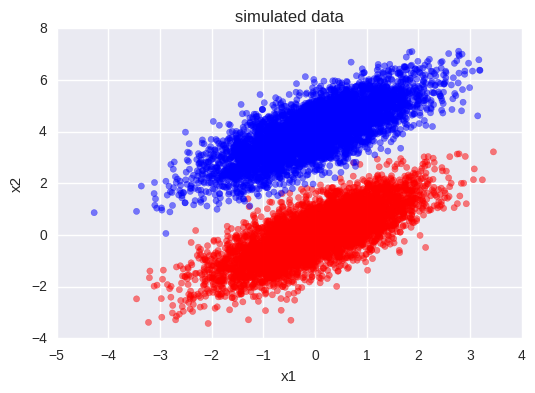

In [4]:
# visualize the simulation
colorPlate = {0:"red",1:"blue"}
colors = [colorPlate[c] for c in y]
plt.scatter(X[:,0], X[:,1], color = colors, alpha=0.5);
plt.title("simulated data");
plt.xlabel("x1");
plt.ylabel("x2");

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Since we do not have any training phase of the KNN model, we will go to the prediction of test data directly

In [104]:
def KNN(X_train, y_train, X_test, k):
    """Input
    train: 
    test:
    k:
    
    return: prediction of test class
    """
    if k <= 0 or k > X_train.shape[0]:
        print("please choose the proper k")
        raise ValueError
    
    pred = []
    
    for i in range(X_test.shape[0]):
        # calculate the distance of one test sample to all train samples with vectorization
        dist = np.sqrt(np.power((X_train - X_test[i,:]),2).sum(axis = 1))
        
        # get label of the train samples in the k smallest distance to the test sample
        labels = y_train[dist.argsort()[:k]].reshape(-1,)
        
        # get the majority in the labels
        # this method is for binary classifier
        if labels.mean() > 0.5:
            pred.append(1)
        else:
            pred.append(0)
            
    return np.array(pred)

Test

Then, we will use the test data to evaluate the performace of KNN

In [109]:
# make prediction
pred = KNN(X_train, y_train, X_test, 1)

Let's have a look at the confusion matrix

In [115]:
sns.set_style("white")

# plot confusion matrix
def plot_confusion_matrix(cm, classes,title,cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itr.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i,cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[1011    1]
 [   2  986]]


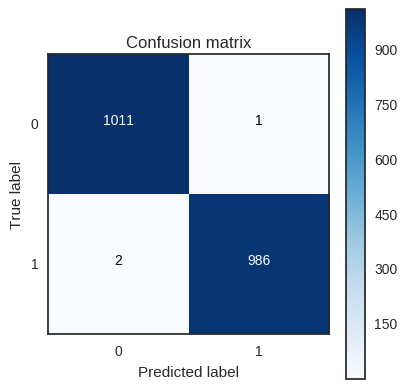

accuracy is:0.9985


In [119]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure(figsize=(4,4))
plot_confusion_matrix(cnf_matrix, classes=[0,1],title='Confusion matrix')

plt.show()
print("accuracy is:" + str((cnf_matrix[0,0]+cnf_matrix[1,1])/cnf_matrix.sum()))

The model performs well on this simulated data set